# 1. Exercices préliminaires : Dot plot

## 1.1. Dot plot simple

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 10 22:24:47 2022

@author: Bouaziz Fortas
"""
import matplotlib.pyplot as plt
import numpy as np
import itertools
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [2]:
# Init data
#np.random.seed(42)
#x = np.random.choice(['A', 'T', 'G', 'C'], 50)
#y = np.random.choice(['T', 'A', 'C', 'G'], 50)
x = ['G', 'T', 'T', 'U', 'I', 'P']
y = ['E', 'G', 'T', 'P']

In [3]:
print("X : ", x)
print("y : ", y)

X :  ['G', 'T', 'T', 'U', 'I', 'P']
y :  ['E', 'G', 'T', 'P']


In [4]:
def listPairValeur(list1, list2):
    return [(i, j) for i in range(len(list1)) for j in range(len(list2)) if list1[i] == list2[j]]

In [5]:
matches_index = listPairValeur(x, y)
print(matches_index)

[(0, 1), (1, 2), (2, 2), (5, 3)]


In [6]:
def dotPlot(matches):
    data = np.array(matches)
    # print(data)
    x, y = data.T
    # print("X : ",x)
    # print("Y : ",y)
    plt.title("Dot plot")
    plt.xlabel("sequence A")
    plt.ylabel("sequence B")
    plt.scatter(x, y, c='blue', marker='x', s=20)
    # plt.plot(x, y, color='red', linewidth=2)
    plt.show()

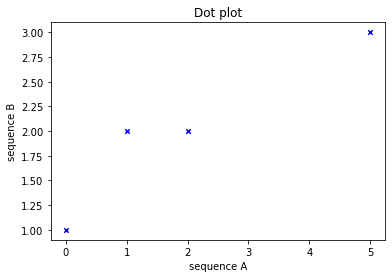

In [7]:
dotPlot(matches_index)

## 1.2. Dot plot avec fenêtre glissante

In [8]:
def dotplotWindow(seqA, seqB, window, minScore):
    i=0
    list_ = []
    len_a = len(seqA)
    len_b = len(seqB)
    while i < (len_a-window+1):
        j = 0
        while j < (len_b-window+1) :
            count=0
            for z in range(0, window):
                if (seqA[i + z] == seqB[j + z]):
                    count = count + 1
            if (count == minScore):
                list_.append([i, j])
                plt.scatter(i, j, c='blue', marker='x', s=20)
            j = j + 1
        i = i + 1
   
    print(list_)
    plt.title("Dot plot")
    plt.xlabel("sequence A")
    plt.ylabel("sequence B")
    plt.show()
    

[[0, 3], [1, 1], [1, 4], [1, 5], [1, 8], [2, 1], [2, 4], [2, 5], [2, 8], [3, 1], [3, 4], [3, 5], [3, 8], [7, 7], [8, 1], [8, 4], [8, 5], [8, 8]]


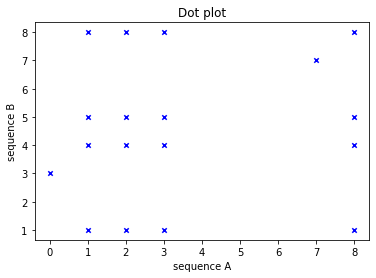

In [42]:
dotplotWindow('GTTTTUIPTT', 'ETTGTTTPTT', 2,2)

# 2. Programmation dynamique

## 2.1. Needleman et Wunsch

In [39]:
def algoNW(x, y, identité = 1, operant = 0, gap = 0):
    len_x = len(x)
    len_y = len(y)
    
    # Score optimal à chaque paire de caractères possible.
    F = np.zeros((len_x + 1, len_y + 1))
    F[:,0] = np.linspace(0, -len_x * gap, len_x + 1)
    F[0,:] = np.linspace(0, -len_y * gap, len_y + 1)
    print("F : \n",F)
    
    # Pointeurs pour tracer un alignement optimal.
    P = np.zeros((len_x + 1, len_y + 1))
    P[:,0] = 3
#     print("P : \n",P)
    
    # Score temporaire.
    temp = np.zeros(3)
    print("Temp : \n",temp)
    for i in range(len_x):
        for j in range(len_y):
            if x[i] == y[j]:
                temp[0] = F[i,j] + identité
            else:
                temp[0] = F[i,j] - operant
            temp[1] = F[i,j+1] - gap
            temp[2] = F[i+1,j] - gap
            tmax = np.max(temp)
            F[i+1,j+1] = tmax
            if temp[0] == tmax:
                P[i+1,j+1] += 2
            if temp[1] == tmax:
                P[i+1,j+1] += 3
            if temp[2] == tmax:
                P[i+1,j+1] += 4
    
    print("P : \n",P)
    # Trace à travers un alignement optimal.
    i = len_x
    j = len_y
    trace_x = []
    trace_y = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            trace_x.append(x[i-1])
            trace_y.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            trace_x.append(x[i-1])
            trace_y.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            trace_x.append('-')
            trace_y.append(y[j-1])
            j -= 1
    # Inverser les traces
    trace_x = ''.join(trace_x)[::-1]
    trace_y = ''.join(trace_y)[::-1]
    return '\n'.join([trace_x, trace_y])


In [40]:
S = ['A', 'C', 'G', 'G', 'G', 'T']
T = ['A', 'C', 'G']
print(algoNW(S, T))

F : 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Temp : 
 [0. 0. 0.]
P : 
 [[3. 0. 0. 0.]
 [3. 2. 4. 4.]
 [3. 3. 2. 4.]
 [3. 3. 3. 2.]
 [3. 3. 3. 5.]
 [3. 3. 3. 5.]
 [3. 3. 3. 3.]]
ACGGGT
AC--G-


## 2.2. Smith et Waterman

In [22]:
def matrix(a, b, match_score=1, gap=0):
    H = np.zeros((len(a) + 1, len(b) + 1), np.int)

    for i, j in itertools.product(range(1, H.shape[0]), range(1, H.shape[1])):
        match = H[i - 1, j - 1] + (match_score if a[i - 1] == b[j - 1] else - match_score)
        delete = H[i - 1, j] - gap
        insert = H[i, j - 1] - gap
        H[i, j] = max(match, delete, insert, 0)
    return H

In [23]:
def traceback(H, b, b_='', old_i=0):
    # flip H to get index of **last** occurrence of H.max() with np.argmax()
    H_flip = np.flip(np.flip(H, 0), 1)
    i_, j_ = np.unravel_index(H_flip.argmax(), H_flip.shape)
    i, j = np.subtract(H.shape, (i_ + 1, j_ + 1))  # (i, j) are **last** indexes of H.max()
    if H[i, j] == 0:
        return b_, j
    b_ = b[j - 1] + '-' + b_ if old_i - i > 1 else b[j - 1] + b_
    return traceback(H[0:i, 0:j], b, b_, i)


In [24]:
def algoSW(a, b, match_score=1, gap_cost=0):
    a, b = a.upper(), b.upper()
    H = matrix(a, b, match_score, gap_cost)
    b_, pos = traceback(H, b)
    return pos, pos + len(b_)

In [25]:
print(matrix(S, T))
H = matrix(S, T)
print(traceback(H, S))
s = 'ACGGGT'
t = 'ACG'
start, end = algoSW(s, t)
print(s[start:end])

[[0 0 0 0]
 [0 1 1 1]
 [0 1 2 2]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
('ACG', 0)
ACG


## 2.3. Bibliothèque BioPython
#### BioPython est un ensemble d'outils développés en Python et dédiés à la manipulation de données de biologie moléculaire

In [43]:
def algimentsGlobal(s, t):
    print("********* Aligments Global : *********")
    alignments = pairwise2.align.globalxx(s, t)
    for a in alignments:
        print(format_alignment(*a))

In [44]:
algimentsGlobal(s,t)

********* Aligments Global : *********
ACGGGT
||  | 
AC--G-
  Score=3

ACGGGT
|| |  
AC-G--
  Score=3

ACGGGT
|||   
ACG---
  Score=3



In [45]:
def algimentsLocal(s, t):
    print("********* Algiments Local : *********")
    alignments = pairwise2.align.localxx(s, t)
    for l in alignments:
        print(format_alignment(*l))

In [46]:
algimentsLocal(s,t)

********* Algiments Local : *********
1 ACGGG
  ||  |
1 AC--G
  Score=3

1 ACGG
  || |
1 AC-G
  Score=3

1 ACG
  |||
1 ACG
  Score=3

